In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "data.csv"

In [3]:
df = pd.read_csv(path, encoding='latin1')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [6]:
df.dropna(subset = ['Global_Sales'], inplace=True)

### Here we count all the null values and then drop the rows with all the missing global sales values.

In [7]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

### Here we converted the year column to datetime format. 

In [8]:
len(df)

16596

In [9]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [10]:
df.groupby('Publisher')[['Name']].nunique().sort_values(by = 'Name', ascending = False).head()

,Name
Publisher,
Namco Bandai Games,776
Nintendo,667
Konami Digital Entertainment,640
Sony Computer Entertainment,621
Electronic Arts,606


<AxesSubplot:title={'center':'Publisher Video Game Count'}, xlabel='Publisher', ylabel='Video Game Count'>

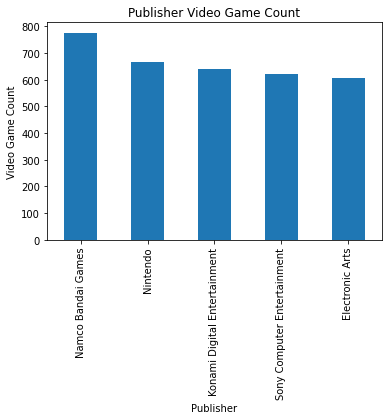

In [11]:
top_publishers = df.groupby('Publisher')[['Name']].nunique().sort_values(by = 'Name', ascending = False).head()
top_publishers.plot(kind='bar',
                    title = "Publisher Video Game Count",
                    ylabel = 'Video Game Count',
                    legend=False)

### Observation:
Here we are looking at the amount of video games each publisher has. Based on the graph, we can see that Namco Bandai Games is at the very top with Nintendo following behind it.

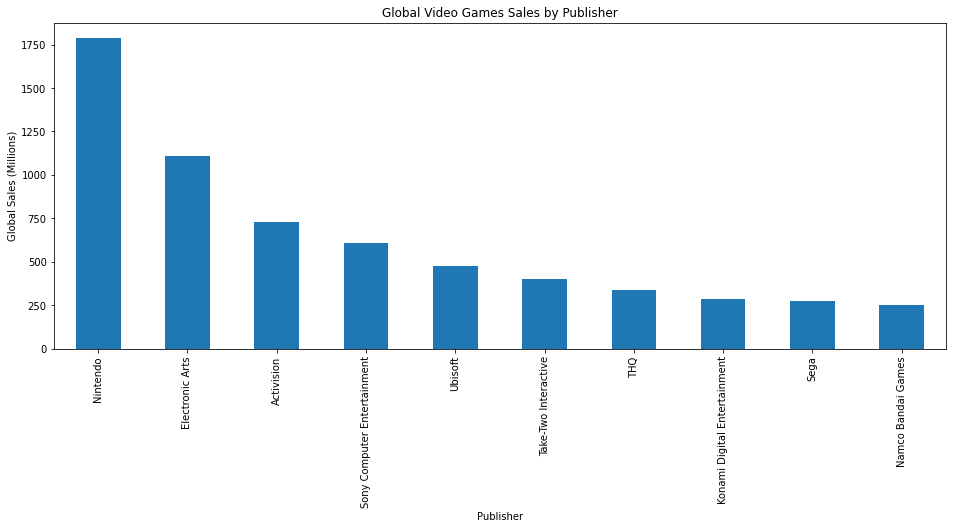

In [12]:
df2 = df.groupby('Publisher')[['Publisher','Global_Sales']].sum().sort_values('Global_Sales', ascending = False).head(10)
df2['Global_Sales'].plot(kind = 'bar', 
                            figsize = (16,6), 
                            ylabel = 'Global Sales (Millions)', 
                            title = 'Global Video Games Sales by Publisher');

### Observation:
 Here is the Global Sales of all the Publishers. Let's take a look at what Nintendo's Global Sale each year. 

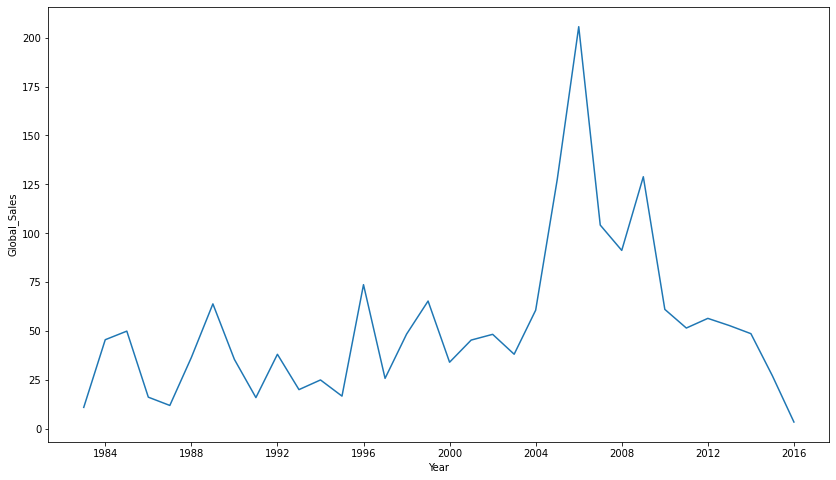

In [13]:
nintendo_data = df[df['Publisher'] == 'Nintendo']
nintendo_data = nintendo_data.groupby('Year')[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].sum()

fig = plt.figure(figsize=(14,8))
sns.lineplot(data = nintendo_data, x = 'Year', y = 'Global_Sales');

### Observation:
Looking at this graph, we can see that around 2004 - 2008, Nintendo had a huge increase in Global Sales. After that it looks like it went back to the same revenue at around 25-50 million. 

In [18]:
nintendo_sold_between = df[df['Year'].between('2004', '2008')]
nintendo_sold_between = nintendo_sold_between.loc[nintendo_sold_between['Publisher'] == "Nintendo"]
nintendo_sold_between.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
6,7,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,11,Nintendogs,DS,2005-01-01,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12,Mario Kart DS,DS,2005-01-01,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
13,14,Wii Fit,Wii,2007-01-01,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005-01-01,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006-01-01,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005-01-01,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30


In [19]:
len(nintendo_sold_between)

229

### Observation
Between 2004-2008, Nintendo has released 229 games with Wii Sports, Mario Kart Wii, and New Super Mario Brothers at the top of the list. Wii Sports is well above the others with 82.74 million in global sales.

In [14]:
df.groupby('Platform')[['Name']].count().sort_values(by = 'Name', ascending = False).head()

,Name
Platform,
DS,2163
PS2,2161
PS3,1328
Wii,1325
X360,1265


<AxesSubplot:title={'center':'Platform Video Game Count'}, xlabel='Platform', ylabel='Video Game Count'>

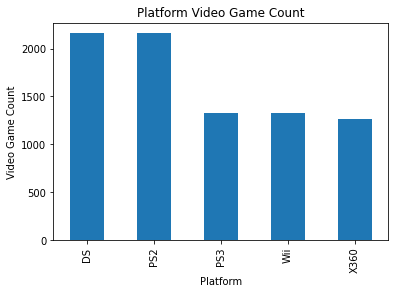

In [13]:
top_platform = df.groupby('Platform')[['Name']].nunique().sort_values(by = 'Name', ascending = False).head()
top_platform.plot(kind='bar',
                    title = "Platform Video Game Count",
                    ylabel = 'Video Game Count',
                    legend=False)

### Observation:
Here we can see thawt the D2 and PS2 are at the top of the Platform count with PS3, Wii and X360x rising behind.

In [19]:
df[['Name', 'Platform', 'Year','Publisher','NA_Sales']].head(10).sort_values(by = 'NA_Sales', ascending = False)

,Name,Platform,Year,Publisher,NA_Sales
0,Wii Sports,Wii,2006,Nintendo,41.49
1,Super Mario Bros.,NES,1985,Nintendo,29.08
9,Duck Hunt,NES,1984,Nintendo,26.93
5,Tetris,GB,1989,Nintendo,23.20
2,Mario Kart Wii,Wii,2008,Nintendo,15.85
3,Wii Sports Resort,Wii,2009,Nintendo,15.75
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,14.59
7,Wii Play,Wii,2006,Nintendo,14.03
6,New Super Mario Bros.,DS,2006,Nintendo,11.38
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,11.27


### Observation: 
Here we can see that the top Video Games sales in the North American region are Wii Sports, Super Mario Brothers, and Duck Hunt. It is very interesting to see that games from the mid 1950s are still popular and getting sold.

In [20]:
df[['Name', 'Platform', 'Year','Publisher','EU_Sales']].head(10).sort_values(by = 'EU_Sales', ascending = False)

,Name,Platform,Year,Publisher,EU_Sales
0,Wii Sports,Wii,2006,Nintendo,29.02
2,Mario Kart Wii,Wii,2008,Nintendo,12.88
3,Wii Sports Resort,Wii,2009,Nintendo,11.01
6,New Super Mario Bros.,DS,2006,Nintendo,9.23
7,Wii Play,Wii,2006,Nintendo,9.20
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,8.89
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,7.06
1,Super Mario Bros.,NES,1985,Nintendo,3.58
5,Tetris,GB,1989,Nintendo,2.26
9,Duck Hunt,NES,1984,Nintendo,0.63


### Observation:
Here we are looking at the top video games sold in the European region. The top 3 video games are Wii Sports, Mario Kart Wii, and Wii Sports Resort. When we compare the NA and EU, we can see that Wii Sports is still at the top but the 2nd and 3rd most sold games are different. 

In [21]:
df[['Name', 'Platform', 'Year','Publisher','JP_Sales']].head(10).sort_values(by = 'JP_Sales', ascending = False)

,Name,Platform,Year,Publisher,JP_Sales
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,10.22
1,Super Mario Bros.,NES,1985,Nintendo,6.81
6,New Super Mario Bros.,DS,2006,Nintendo,6.50
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,4.70
5,Tetris,GB,1989,Nintendo,4.22
2,Mario Kart Wii,Wii,2008,Nintendo,3.79
0,Wii Sports,Wii,2006,Nintendo,3.77
3,Wii Sports Resort,Wii,2009,Nintendo,3.28
7,Wii Play,Wii,2006,Nintendo,2.93
9,Duck Hunt,NES,1984,Nintendo,0.28


### Observation:
Here we are looking at the top video games sold in Japan. We can see that Pokemon Red/Pokemon Blue, Super Mario Bros, and New Super Mario Brothers are at the time. It is interesting to see the the top games from different regions are different. 

In [22]:
df[['Name', 'Platform', 'Year','Publisher','Other_Sales']].head(10).sort_values(by = 'Other_Sales', ascending = False)

,Name,Platform,Year,Publisher,Other_Sales
0,Wii Sports,Wii,2006,Nintendo,8.46
2,Mario Kart Wii,Wii,2008,Nintendo,3.31
3,Wii Sports Resort,Wii,2009,Nintendo,2.96
6,New Super Mario Bros.,DS,2006,Nintendo,2.90
7,Wii Play,Wii,2006,Nintendo,2.85
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,2.26
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,1.00
1,Super Mario Bros.,NES,1985,Nintendo,0.77
5,Tetris,GB,1989,Nintendo,0.58
9,Duck Hunt,NES,1984,Nintendo,0.47


In [23]:
df[['Name', 'Platform', 'Year','Publisher','Global_Sales']].head(10).sort_values(by = 'Global_Sales', ascending = False)

,Name,Platform,Year,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Nintendo,35.82
3,Wii Sports Resort,Wii,2009,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,31.37
5,Tetris,GB,1989,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Nintendo,30.01
7,Wii Play,Wii,2006,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,28.62
9,Duck Hunt,NES,1984,Nintendo,28.31


### Observations:
Here we are looking at all the Global Sales of video games. Overall, we can see that Wii Sports, Super Maio Brothers, and Mario Kart Wii are at the top of the list. Looking through this data, it seems that culture of a region could influence a games top sold video games.

In [20]:
df.groupby('Genre')[['Name']].count().sort_values(by = 'Name', ascending = False).head()

,Name
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310


<AxesSubplot:title={'center':'Top Genre Video Game Count'}, xlabel='Genre', ylabel='Genre Video Game Count'>

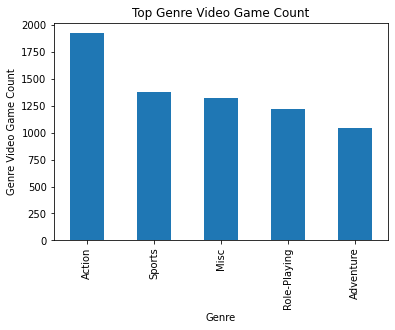

In [22]:
top_genre = df.groupby('Genre')[['Name']].nunique().sort_values(by = 'Name', ascending = False).head()
top_genre.plot(kind='bar',
                    title = "Top Genre Video Game Count",
                    ylabel = 'Genre Video Game Count',
                    legend=False)

### Observation:
Here we can see that most of the Video Games in this dataset are action and sports genre.